# Gender Pay Gap

In the process of a job search I have also researched the paychecks based on the different factors. I have stumbled upon the dataset by Glassdoor (https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap) and decided to analyze the data. 

Today a big topic is the gender gap pay. It implied that women today are paid less than men. But we cannot draw these conclusions based just on the gender. Further analisys is taking into the consideration more factors than just gender itself.

### Hypotesys
Women are paid less just based on their gender.

I will try to reject the hypotesys by comparing the base pay between man and woman, but taking into the consideration the factors that also play a big role.


In [144]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statistics
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('C:/Users/Miro/Desktop/Portfolio/employ/Gender_Pay_Gap.csv')
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


Since this is my first project I have found quite clean data. However, I have made sure that data is as clean as I need it.


In [145]:
#Looking for missing values
df.isnull().mean()

JobTitle     0.0
Gender       0.0
Age          0.0
PerfEval     0.0
Education    0.0
Dept         0.0
Seniority    0.0
BasePay      0.0
Bonus        0.0
dtype: float64

In [146]:
#Checking the types of inputs
df.dtypes

JobTitle     object
Gender       object
Age           int64
PerfEval      int64
Education    object
Dept         object
Seniority     int64
BasePay       int64
Bonus         int64
dtype: object

In [147]:
#Checking some of the values if they have the correct characterization
print(df['Gender'].unique())
print(df['PerfEval'].unique())
print(df['Dept'].unique())
print(df['Education'].unique())
print(df['Seniority'].unique())

['Female' 'Male']
[5 4 3 2 1]
['Operations' 'Management' 'Administration' 'Sales' 'Engineering']
['College' 'PhD' 'Masters' 'High School']
[2 5 4 3 1]


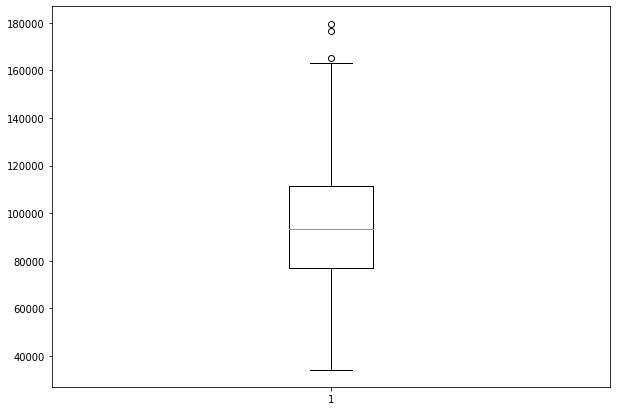

In [148]:
#Outliers
#First in order to see if we have outliers we are going to create boxplot
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['BasePay'])
plt.show()

I was not going to just drop the outliers so I wanted to see what are the entries. There were 2 entries, both males, with 4+ years of senority and with a PhD. That made sense for them to have higher paychecks, so I left them as data. 

But here is where I was curious. Even there are only 2 outliers based on the base pay, why are both of them male? 
I will try to visualize if men do have higher salaries and what might be the reason.

First, let's compare the average pays regarding to the gender:

In [149]:
df_f = df.loc[df['Gender'] == 'Female']
df_m = df.loc[df['Gender'] == 'Male']

mean=statistics.mean(df['BasePay'])
mean_f=statistics.mean(df_f['BasePay'])
mean_m=statistics.mean(df_m['BasePay'])

print (round(mean, 2), round(mean_f,2), round(mean_m,2))

94472.65 89942.82 98457.55


It is obvious that in average women are earning less than men. But we still cannot make assumptions that it is purely based on the gender. Seniority is a big factor deciding the base pay. Let's compare the average pay of men and women based on their seniority.

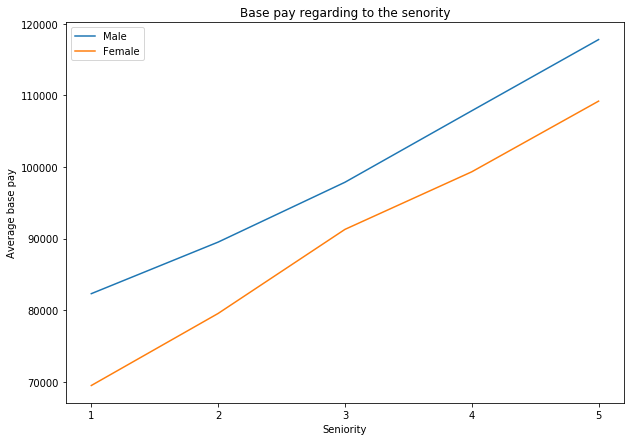

In [150]:
x = df['Seniority'].unique()
mean_sen_m = df_m.groupby('Seniority')['BasePay'].mean()
mean_sen_f = df_f.groupby('Seniority')['BasePay'].mean()

mean_sen_m = mean_sen_m.to_numpy()
mean_sen_f = mean_sen_f.to_numpy()
x.sort()

fig2 = plt.figure(figsize =(10, 7))
plt.plot(x, mean_sen_m, label="Male")
plt.plot(x, mean_sen_f, label="Female")
plt.xticks(np.arange(1, 6, step=1))
plt.title('Base pay regarding to the senority')
plt.xlabel('Seniority')
plt.ylabel('Average base pay')
plt.legend(loc="upper left")
plt.xticks(np.arange(1, 6, step=1))
plt.show()

This again shows that no matter the seniority, females are paid less. Next thing that we should consider is the education. A high-school graduate will not earn the same amount like a college graduate. So let's investigate what are the educational backgrounds of both men and women.

The next plot shows the count based on the gender and education.

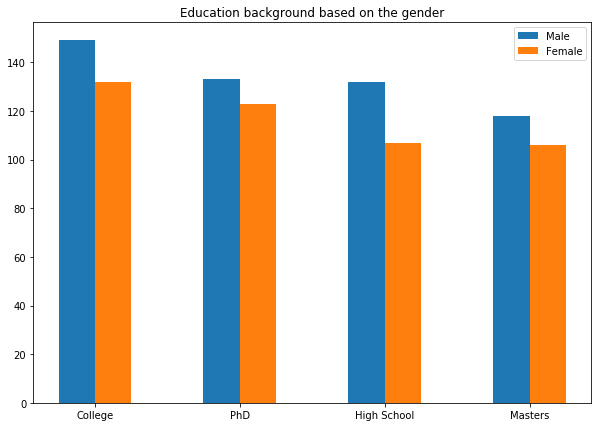

In [151]:
n=4
r = np.arange(n)
width = 0.25
fig3 = plt.subplots(figsize =(10, 7))
plt.bar(r, df_m['Education'].value_counts().to_numpy(), label = 'Male', width = 0.25)
plt.bar(r + width, df_f['Education'].value_counts().to_numpy(), label = 'Female', width = 0.25)
plt.xticks(r + width/2, df_f['Education'].unique())
plt.legend()
plt.title("Education background based on the gender")
plt.show()

From this plot it seems that men have better education than women, and that might be the reason of pay gap.
But actually, this is not accurate statement. Because it is obvious that more men were survied, more men will have higher education. In order to accurately show how many percentage of men and woman are having higher or lower education, we need to divide each categorial sum with total number of each gender.

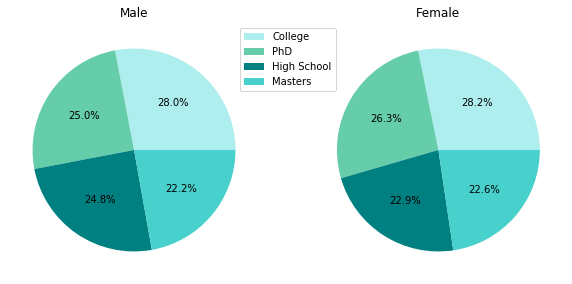

In [152]:
labels = df_f['Education'].unique()
colors = ['paleturquoise', 'mediumaquamarine', 'teal', 'mediumturquoise']
fig4= plt.subplots(figsize =(10, 7))
plt.subplot(1, 2, 1)
plt.pie(df_m['Education'].value_counts().to_numpy()/count_m, autopct='%1.1f%%', colors = colors)
plt.legend(labels, loc='upper left', bbox_to_anchor=(0.9, 1))
plt.title('Male')
plt.subplot(1, 2, 2)
plt.pie(df_f['Education'].value_counts().to_numpy()/count_f, autopct='%1.1f%%', colors = colors)
plt.title('Female')
plt.show()

This shows a better picture of how is education divided between genders. As we can see women have better percentage in all levels except the high school, which is the lowest educational level. So it is obvious that women have better education than men. What is then the reason for lower pay?

Next factor we should look up is the performance evaluation. We cannot expect the person with the top performance having the same pay as the ones performing average or lower. 
In order to be more accurate we are going to compare the average pay based on the performance evaluation, but within the group with the same education background.

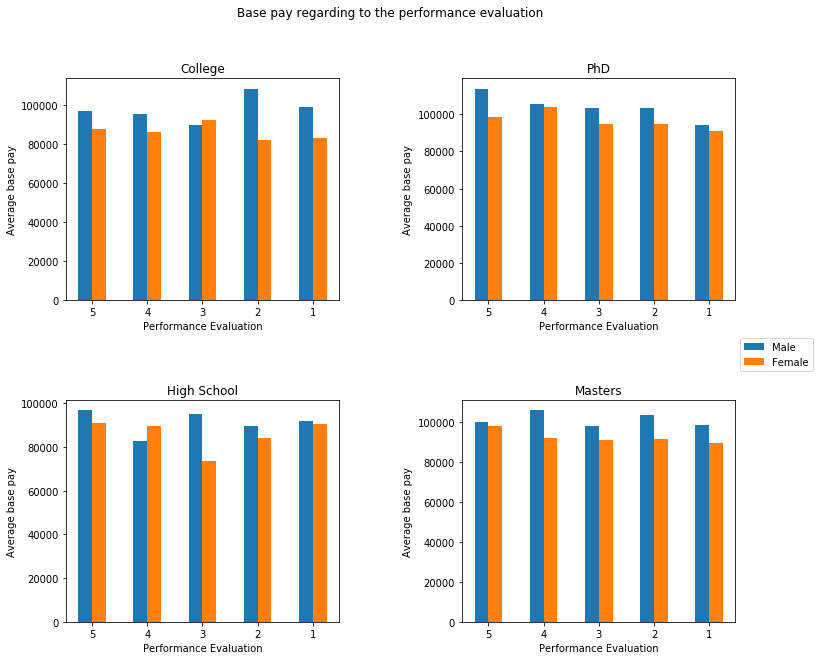

In [153]:
df_m_col=df_m.loc[df['Education'] == 'College']
df_f_col=df_f.loc[df['Education'] == 'College']
df_m_phd=df_m.loc[df['Education'] == 'PhD']
df_f_phd=df_f.loc[df['Education'] == 'PhD']
df_m_hs=df_m.loc[df['Education'] == 'High School']
df_f_hs=df_f.loc[df['Education'] == 'High School']
df_m_mas=df_m.loc[df['Education'] == 'Masters']
df_f_mas=df_f.loc[df['Education'] == 'Masters']

x = df['PerfEval'].unique()
x.sort()

mean_perf_m_col = df_m_col.groupby('PerfEval')['BasePay'].mean()
mean_perf_f_col = df_f_col.groupby('PerfEval')['BasePay'].mean()
mean_perf_m_phd = df_m_phd.groupby('PerfEval')['BasePay'].mean()
mean_perf_f_phd = df_f_phd.groupby('PerfEval')['BasePay'].mean()
mean_perf_m_hs = df_m_hs.groupby('PerfEval')['BasePay'].mean()
mean_perf_f_hs = df_f_hs.groupby('PerfEval')['BasePay'].mean()
mean_perf_m_mas = df_m_mas.groupby('PerfEval')['BasePay'].mean()
mean_perf_f_mas = df_f_mas.groupby('PerfEval')['BasePay'].mean()

mean_perf_m_col = mean_perf_m_col.to_numpy()
mean_perf_f_col = mean_perf_f_col.to_numpy()
mean_perf_m_phd = mean_perf_m_phd.to_numpy()
mean_perf_f_phd= mean_perf_f_phd.to_numpy()
mean_perf_m_hs = mean_perf_m_hs.to_numpy()
mean_perf_f_hs = mean_perf_f_hs.to_numpy()
mean_perf_m_mas = mean_perf_m_mas.to_numpy()
mean_perf_f_mas = mean_perf_f_mas.to_numpy()

fig5 = plt.subplots(figsize = (12,10))
n=5
r = np.arange(n)
plt.subplot(2, 2, 1)
plt.bar(r, mean_perf_m_col, label="Male", width = 0.25)
plt.bar(r + width, mean_perf_f_col, label="Female", width = 0.25)
plt.xticks(r + width/2, df_f['PerfEval'].unique())
plt.title('College')
plt.xlabel('Performance Evaluation')
plt.ylabel('Average base pay')

plt.subplot(2, 2, 2)
plt.bar(r, mean_perf_m_phd, label="Male", width = 0.25)
plt.bar(r + width, mean_perf_f_phd, label="Female", width = 0.25)
plt.xticks(r + width/2, df_f['PerfEval'].unique())
plt.title('PhD')
plt.xlabel('Performance Evaluation')
plt.ylabel('Average base pay')

plt.subplot(2, 2, 3)
plt.bar(r, mean_perf_m_hs, label="Male", width = 0.25)
plt.bar(r + width, mean_perf_f_hs, label="Female", width = 0.25)
plt.xticks(r + width/2, df_f['PerfEval'].unique())
plt.title('High School')
plt.xlabel('Performance Evaluation')
plt.ylabel('Average base pay')

plt.subplot(2, 2, 4)
plt.bar(r, mean_perf_m_mas, label="Male", width = 0.25)
plt.bar(r + width, mean_perf_f_mas, label="Female", width = 0.25)
plt.xticks(r + width/2, df_f['PerfEval'].unique())
plt.title('Masters')
plt.xlabel('Performance Evaluation')
plt.ylabel('Average base pay')
plt.suptitle('Base pay regarding to the performance evaluation')
plt.subplots_adjust(wspace=0.45, hspace=0.45)
plt.legend(['Male', 'Female'], loc='upper left', bbox_to_anchor=(1, 1.3))
plt.show()

In most cases we can read that men are being significatly more paid than women.

### Conclusion

The topic of this analysis was to show the inequality of the pay between men and women. I have approached the problem with the "proof by contradiction" method.

First I assumed that it might be the fact that men have more seniority, but after comparing the pay within the same seniority classes, that showed to be false.

I continued with the education background. But it resulted in the conclusion that women have generally higher education then men in this dataset.

Regarding the performance evaluation, I came to the simmilar conclusion, while also researching within each educational background.

In conclusion, based on this dataset, we can say that women have a lower base pay than men based only on their gender.

#### Comments and further research
The conclusion is made based only on the dataset used for the analysis. There is a space for further analysis like comparing the bonus feature, or importance of department and/or job position.